#Proyecto Final de Machine Learning: **Aprendizje por refuerzo**
---




## Framework teórico
---

En el aprendizaje por refuerzo se busca que un _agente_ (La I.A.) pueda aprender por medio de un _entorno_ interactuando y obteniendo una retroalimentación positiva o negativa de sus acciones, reforzando o desalentando su comportamiento.
Así __sin ningún tipo de supervisión__ el agente aprendería a reconocer las reglas y objetivos impuestos por medio de prueba y error.

¿Cómo podemos definir formalmente esta idea?

El aprendizaje reforzado es el paradigma o framework para resolver tareas deseadas (también llamadas _problemas de decisión_) construyendo agentes que aprenden del entorno por medio de la interacción prueba y error con éste, recibiendo recompensas positivas o negativas como único medio de retroalimentación. 🤖

En otras palabras:


* El agente realiza un acción
* El entorno cambia dada esta acción y se proporciona una recompensa dependiendo de cómo responde este


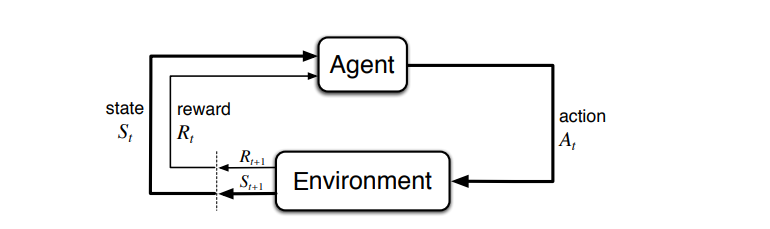

"Toward Data Science." Reinforcement Learning 101.
https://towardsdatascience.com/reinforcement-learning-101-e24b50e1d292.

Se denota:

$S_t$ el estado $t$, y por lo tanto $S_0$ el estado inicial.

$A_t$ la acción tomada en el estado $S_t$

$R_{t+1}$ la recompensa dada por esta acción (o por el nuevo estado $S_t$)

Así se puede ver matemáticamente un proceso RL como la sucesión estado, acción, recompensa y siguiente estado.
$$\left\{S_t,A_t,R_{t+1},S_{t+1}\right\}_{t=0}$$

Y de esta forma definirse formalmente cual es el objetivo del agente: Maximizar la recompensa acumulada. Llamada __expected return__.

Una caracteristica súmamente importante de los procesos RL es que la acción $A_t$ necesita únicamente del estado $S_t$ y no de los previos.

## Espacio de estados y acciones

Un __estado__ formalmente es la descripción completa de todo el entorno sin información escondida.

Una __observación__ es la descripción parcial de un estado.

Si $A_t$ pertenece a un conjunto finito se dice que el espacio de acciones es __discreto__.
De lo contrario se dice que es __continuo__

## Recompensa y descuento

Ya se vio que el objetivo es maximizar la recompensa acumulada. i.e.
$$∑_{k=0}^∞R_{k+1}$$
la recompensa acumulada para cada paso $t$ se denota
$$ R(\tau)=∑_{k=0}^∞R_{t+1+k} $$

En la práctica tomar la recompensa acumulada no es viable, pues se le da el mismo peso a recompensas tempranas (como $R_1$) que son más predecibles y a tardías ($R_{1000}$) que a largo plazo son más complicadas de determinar al no tener certeza de cómo evolucionará el entorno dadas acciones previas

Se define así un __descuento__, que será un parámetro el cual tenga en cuenta si la recompensa está muy alejada de cierto estado

$$ R(\tau):=∑_{k=0}^∞ \gamma^{k} R_{t+1+k} $$

$γ\in(0,1)$, generalmente entre $0.95$ y $0.99$.
Entre más grande el gamma menor el descuento y tendrá más peso las recompensas a largo plazo.
Entre más pequeño mayor el descuento y el agente se concentrara más en las recompnesas inmediatas.

## Tipos de tareas


*   Episódicas: Aquellas que tienen un fin concreto. Esto es, tienen un punto inicial y uno (o varios) puntos finales.
*   Continuas: En este caso no hay punto final, por lo que se debe aprender a escoger la mejor acción de forma simultánea interactuando con el entorno

## Exploración y explotación

Una preocupación que puede surgir con los procesos RL es si las acciones que se están tomando afectan negativamente a potenciales mejores acciones en un futuro. Esto es, que algun conjunto de acciones eviten que se pueda llegar a una acción con una mejor recompensa

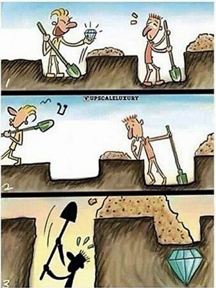

"Reinforcement Learning: Exploration vs Exploitation Tradeoff." AI-ML-Analytics. https://ai-ml-analytics.com/reinforcement-learning-exploration-vs-exploitation-tradeoff/.

*   La __exploración__ es tomar acciones aleatorias para poder encontrar más información sobre el entorno y sus interacciones con estas
*   La __explotación__ es aprovechar la información conocida para maximizar la recompensa, tomando el riesgo de encontrar una posible mejor

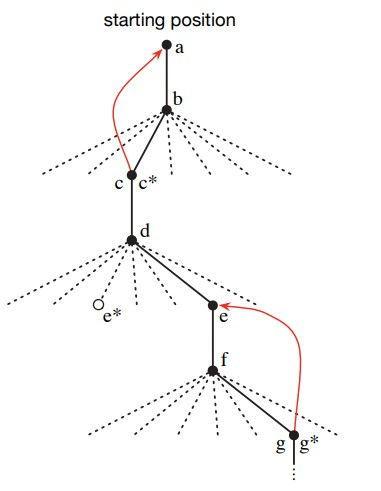

Sutton, Richard S. and Barto, Andrew G.. "Dimensions of Reinforcement Learning" In Reinforcement Learning: An Introduction, Chapter 10.
http://incompleteideas.net/book/ebook/node10.html.

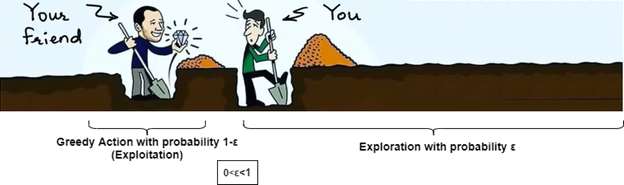

"Reinforcement Learning: Exploration vs Exploitation Tradeoff." AI-ML-Analytics. https://ai-ml-analytics.com/reinforcement-learning-exploration-vs-exploitation-tradeoff/.

## Políticas

La política, denotada $π$, puede verse como el cerebro de un proceso de RL. Es la función que decide qué acción tomar para un estado dado.
$$\pi(S_t)=A_t$$
Por lo tanto define el comportamiento del agente. Esta función es la que se quiere optimizar, la política óptima $\pi^*$ es aquella que __maximiza el expected return__, y es la política ideal a la que se quiere llegar por medio del entrenamiento.

Hay dos formas de encontrar la política óptima:


*   __Directo__: Enseñándole al agente qué acciones tomar dado el estado en que se encuentre. Este enfoque se conoce como __métodos basados en políticas__
*   __Indirecto__: Enseñarle al agente qué estados son más valiosos y tomar acciones que lo acerquen a este. Este enfoque se conoce como __métodos basados en valores__


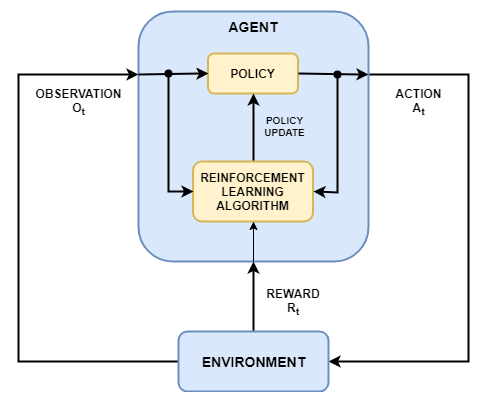

"Create Agents for Reinforcement Learning." MathWorks.
https://es.mathworks.com/help/reinforcement-learning/ug/create-agents-for-reinforcement-learning.html.

### Métodos basados en políticas

Recordar que en este método el objetivo es aprender la función $\pi$ directamente



Esta función $\pi$ crea un mapeo para cada estado a la 'mejor' acción (aquella que produzca la mejor recompensa)

Puede tener un caracter deterministico o probabilistico:
* Deterministico: Dado un estado  siempre retornará la misma acción $\pi(S_t)=A_t$
* Estocastico: toma una distribución de probabilidad sobre el conjutno de acciones dado el estado $\pi(S_t)=P[A|S_t]$

### Métodos basados en valores

En este caso no aprende en sí la política, pero aprende una __función de valores__, una función que mapea cada estado con el valor esperado de estar en ese estado.

Este es el valor esperado del discounted return dado que se empiece en ese estado específico y tome tome el camino con el mayor valor total

$$v_π(S) = \mathbb{E}_\pi\left[∑_{k=0}^∞ \gamma^{k} R_{t+1+k} | S_t=S\right]$$



## Algoritmo A2C

Se vio que hay dos típos de métodos diferentes. El algoritmo _Advantage Actor Critic (A2C)_ utiliza una combinación de ambos, un método híbrido que tiene:
* _Un actor_: $\pi_\theta(s)$ que controla cómo se comporta el agente (Método basado en política)
* _Una crítica_: $\hat{q}_w(s,a)$ que mide qué tan buenas son las acciones tomadas por el agente (Método basado en valor)

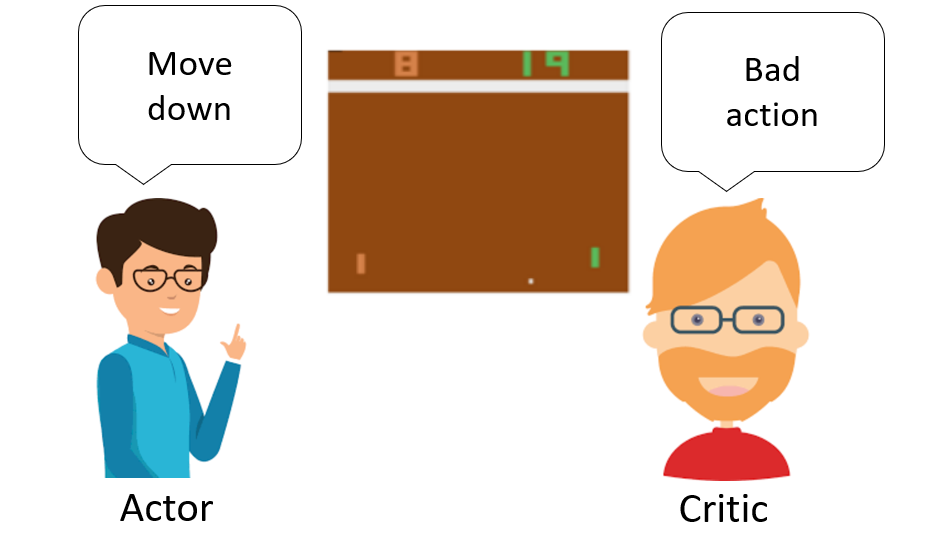

"A2C Reinforcement Learning." Pylessons.
https://pylessons.com/A2C-reinforcement-learning.

Veamos cómo interactuan estos dos procesos juntos optimizándose:
* En cada paso $t$ se tiene $S_t$ y se ejecuta $\pi_\theta(S_t)$ determinando la acción $A_t$
* La crítica ejecuta $\hat{q}_w(S_t,A_t)$, este valor es llamado el _Q-valor_
* Se sabe que se produce un nuevo estado $S_{t+1}$ y una recompensa $R_{t+1}$
* Se cambian los parámetros $\theta$ de la política basado en este _Q-valor_
$$ Δθ = α\nabla_θ(\ln(\pi_\theta(S_t)))\hat{q}_w(S_t,A_t)$$
Y con los nuevos parámetros el actor determina la siguiente acción $A_{t+1}$ del estado $S_{t+1}$
 * Notemos que $\nabla_θ\ln(\pi_\theta(S_t))$ es la dirección del gradiente más pronunciado del $\ln$ de nuestra política, se acerca a esta dirección con una tasa constante $α$ y $\hat{q}_w(S_t,A_t)$, si $\hat{q}_w(S_t,A_t)$ tiene un valor alto aumentamos el tamaño de paso, confirmando que la dirección tomada fue en efecto una buena dirección.
* Con esta nueva acción se cambia el parámetro $w$ de la crítica
$$ Δw = β\left( R_{t+1} + γ\hat{q}_w(S_{t+1},A_{t+1}) - \hat{q}_w(S_t,A_t) \right)∇\hat{q}_w(S_t,A_t) $$
 * $Δw$ tiene una tasa ($\beta$) diferente a la de $Δθ$. $R_{t+1} + γ\hat{q}_w(S_{t+1},A_{t+1}) - \hat{q}_w(S_t,A_t)$ se llama el _Error-TD_ y mide la diferencia entre el valor actual del agente y el valor deseado, note que calcula $\hat{q}_w(S_{t+1},A_{t+1})$ por lo tanto $Δw$ estima un nuevo valor para el mismo par $(S_{t+1},A_{t+1})$.
 Esta diferencia de valores mide qué tan diferente es la nueva información recibida, sirviendo de indicar sobre qué tan alta es la oportunida de aprendizaje. i.e. a mayor oportunidad de aprendizaje mayor aumento del paso.

Así el algortimo A2C combina las buenas decisiones (Por parte de la política) y las oportunidades de aprendizaje (por parte de la función de valor)

----

# Implementación de un modelo de RL usando Python
---

Habiendo construido nuestro framework teórico, podemos dedicarnos ahora a estudiar y comprender cómo se construye un modelo de RL usando Python.

## Construcción de un ambiente personalizado.

### Objetivo

Nuestra meta será construir un entorno dos dimensional y rectangular con las siguientes características:

1. Sobre el ambiente se dispondrá, de manera aleatoria, un *agente* y una caja o *target*.
2. El agente podrá desplazarse hacia arriba, abajo, izquierda y derecha.
3. Si el agente se encuentra en una posición adyacente al target, y se mueve en la dirección del mismo, entonces lo desplazará (i.e., el agente podrá empujar la caja).
4. El objetivo del agente será empujar la caja hasta una región definida del ambiente.
5. Buscando que el modelo inicial sea simple, la política del agente será binaria y dispersa. Esto quiere decir que el agente obtendrá 0 como recompensa en cada paso que no consigue el objetivo, y obtendrá 1 cuando sí lo logre.


### Proceso de implementación

Para construir nuestro ambiente usaremos el módulo de Python [Gymnasium](https://gymnasium.farama.org/), módulo estándar de RL que facilita, entro otras cosas, la creación de [ambientes personalizados](https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/).

El proceso de creación consiste, entonces, de lo siguiente:

Comenzamos creando una clase que herede de la clase `gymnasium.Env`. Esta es una clase core de Gymnasium y expone, entre otros, los siguientes métodos y atributos para definir la lógica de nuestro ambiente:

- `action_space`: Almacena todas las acciones válidas que puede ejecutar un agente en el ambiente. Para nuestro ejemplo el espacio de acciones será discreto y de tamaño 4, sin embargo la librería permite espacios continuos y condicionales.

- `observation_space`: Permite definir todas las observaciones válidas por parte del agente. En nuestro caso dichas observaciones serán las posiciones del target y el agente.

- `step()`: Es el método principal del ecosistema. Está encargado de, dada una acción en el espacio de acciones, retornar:
  1. Cuál es la observación resultante de ejecutar la acción.
  2. Cuál fue la recompensa o penalización por ejecutar la acción.
  3. Señales de truncamiento o finalización en caso de que el agente llegue a un 'punto muerto' o consiga el objetivo, respectivamente.
  4. Información que incluya métricas, registros, entre otros.

- `reset()`: Refresca el entorno a un estado inicial y comienza un nuevo episodio. También le brinda al agente una observación inicial.

- `render()`: Grafica el entorno para ilustrar lo que ve el agente. Define toda la lógica visual.

Una vez tenemos definida nuestra clase con los métodos y atributos necesarios, estamos en posición de interactuar y explorar con el entorno.


**Nota** Para priorizar la fluidez en la lectura del trabajo, dejamos
la documentación respectiva al código de cada ambiente creado a lo largo del trabajo en el repositorio [thually/proyectoML2023](https://github.com/thually/proyectoML2023).



## Ejecución del ambiente creado: PushBox

Clonamos e instalamos las dependencias necesarias. También definimos algunas funciones auxiliares que facilitarán la legibilidad del código y nos ayudarán a grabar y mostrar el progreso de nuestro agente tras el entrenamiento.

- `show_render`: Muestra imágenes apartir de la renderización de un entorno

- `record_video` : La usaremos para grabar el comportamiento de nuestro agente tras el entrenamiento.

- `show_video` : Permite incrustar y reproducir un video en Colab

- `train_model` : Entrena un modelo de RL usando el algoritmo A2C, dados un entorno y un número de episodios para entrenar.

In [10]:
#@title
# Clone and setup
#!git clone https://github.com/thually/proyectoML2023 > /dev/null
!git clone https://github.com/Dioprz/reinforcement-learning-project > /dev/null
!cd reinforcement-learning-project && pip install -e . > /dev/null

import sys
sys.path.insert(0,'/content/reinforcement-learning-project') # Add our custom module to PATH

fatal: destination path 'reinforcement-learning-project' already exists and is not an empty directory.


In [11]:
#@title
#Auxiliar functions

from PIL import Image
import os

def display_render(render):
  img_out = Image.fromarray(env.render())
  img_as_img = img_out.convert("RGB")
  display(img_as_img)


# Requires to record
!apt-get update > /dev/null && apt-get install ffmpeg freeglut3-dev xvfb > /dev/null
!pip install "stable-baselines3[extra]>=2.0.0a4" > /dev/null

from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv


# Set up fake display; otherwise rendering will fail
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

import base64
from pathlib import Path
from IPython import display as ipythondisplay

def record_video(env_id, model, video_length=500, prefix="", video_folder="videos/"):
    """
    :param env_id: (str)
    :param model: (RL model)
    :param video_length: (int)
    :param prefix: (str)
    :param video_folder: (str)
    """
    eval_env = DummyVecEnv([lambda: gym.make(env_id, render_mode="rgb_array")])
    # Start the video at step=0 and record 500 steps
    eval_env = VecVideoRecorder(
        eval_env,
        video_folder=video_folder,
        record_video_trigger=lambda step: step == 0,
        video_length=video_length,
        name_prefix=prefix,
    )

    obs = eval_env.reset()
    for _ in range(video_length):
        action, _ = model.predict(obs)
        obs, _, _, _ = eval_env.step(action)

    # Close the video recorder
    eval_env.close()

def show_videos(video_path="", prefix=""):
    """
    Taken from https://github.com/eleurent/highway-env

    :param video_path: (str) Path to the folder containing videos
    :param prefix: (str) Filter the video, showing only the starting with this prefix
    """
    html = []
    for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append(
            """<video alt="{}" autoplay
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>""".format(
                mp4, video_b64.decode("ascii")
            )
        )
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

def train_model(episodes, env_name):
  '''
  episodes: int Number of episodes to train
  env_name: str Name of the custom environment
  '''
  custom_env_path = "custom_envs/" + env_name
  vec_env = make_vec_env(custom_env_path, n_envs = 4)
  prefix = "A2C" + env_name + str(episodes)
  model = A2C("MultiInputPolicy", vec_env, verbose=0)
  model.learn(total_timesteps=episodes)
  record_video(custom_env_path, model, video_length=500, prefix=prefix)
  show_videos("videos", prefix=prefix)

Una vez tenemos nuestro entorno de ejecución configurado, podemos inicializar el ambiente, refrescarlo, y hacer una primera visualización. En este caso el agente está representado por el círculo azul, y nuestra caja o target es el rectángulo cuadrado.

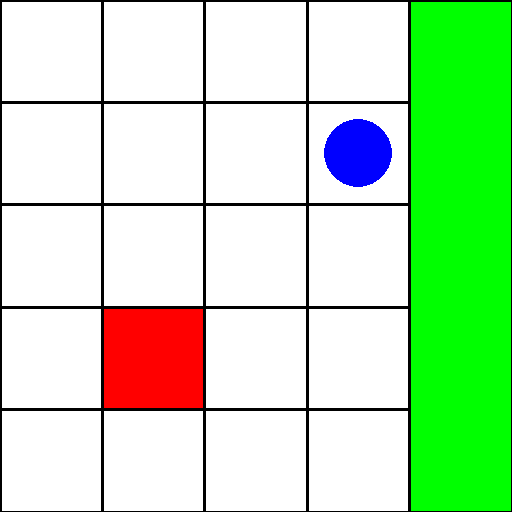

In [12]:
import custom_envs
import gymnasium as gym

env = gym.make('custom_envs/PushBox', render_mode="rgb_array")
env.reset(seed=12345)
display_render(env.render())

El objetivo del entrenamiento será lograr que el agente aprenda a mover la caja roja hasta la línea verde, de forma que ocurra lo siguiente:

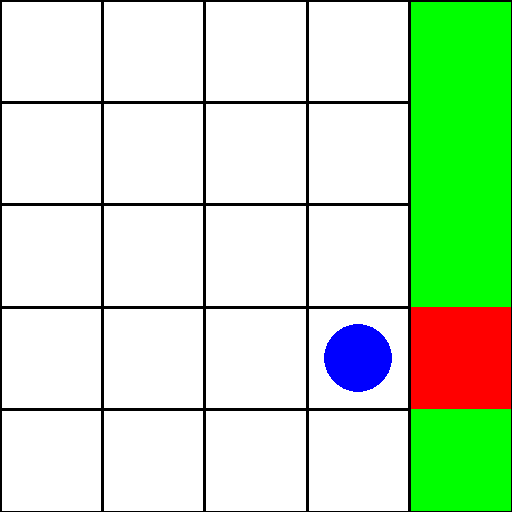

In [13]:
from IPython.display import clear_output
import time
#import numpy as np

actions = [1, 2, 2, 2, 1, 0, 0, 0] #Action maps: 0:Right, 1:Down, 2:Left, 3:Up
observation, info = env.reset(seed=12345)
display_render(env.render())
time.sleep(1)

for act in actions:
    env.step(act)
    clear_output(wait=True)
    display_render(env.render())
    time.sleep(0.5)
env.close()

## Entrenamiento del agente

Una vez hemos creado y visualizado nuestro entorno, podemos comenzar el proceso de entrenamiento del agente. En este caso la librería `stable_baselines` nos provee la función `make_vec_env` con la que es posible crear entornos paralelos que entrenen simultaneamente al agente. También optaremos por entrenar usando el algoritmo `A2C` a lo largo de 1000, 100000 y 250000 de episodios para comparar la capacidad del agente para cumplir su objetivo.

Finalmente grabamos y mostramos el comportamiento de cada modelo una vez es entrenado.

*Nota:* Usaremos el código explícito de entrenamiento una sóla vez. En adelante llamaremos a nuestra función auxiliar `train_model()`, la cuál recibe como argumentos el número de episodios con el que queremos entrenar, y el nombre del ambiente que usaremos.

##### Entrenamiento con 1.000 episodios

In [14]:
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

episodes = 1000
prefix = 'A2C_Pushbox' + str(episodes)

vec_env = make_vec_env("custom_envs/PushBox", n_envs=4) # Parallel environments
model = A2C("MultiInputPolicy", vec_env, verbose=0)
model.learn(total_timesteps=1000)
record_video("custom_envs/PushBox", model, video_length=500, prefix=prefix)
show_videos("videos", prefix=prefix)

Saving video to /content/videos/A2C_Pushbox1000-step-0-to-step-500.mp4
Moviepy - Building video /content/videos/A2C_Pushbox1000-step-0-to-step-500.mp4.
Moviepy - Writing video /content/videos/A2C_Pushbox1000-step-0-to-step-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/A2C_Pushbox1000-step-0-to-step-500.mp4


##### Entrenamiento con 100.000 episodios

In [15]:
episodes = 100000
env_name = 'PushBox'

train_model(episodes, env_name)

Saving video to /content/videos/A2CPushBox100000-step-0-to-step-500.mp4
Moviepy - Building video /content/videos/A2CPushBox100000-step-0-to-step-500.mp4.
Moviepy - Writing video /content/videos/A2CPushBox100000-step-0-to-step-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/A2CPushBox100000-step-0-to-step-500.mp4


##### Entrenamiento con 250.000 episodios

In [16]:
episodes = 250000
env_name = 'PushBox'

train_model(episodes, env_name)

Saving video to /content/videos/A2CPushBox250000-step-0-to-step-500.mp4
Moviepy - Building video /content/videos/A2CPushBox250000-step-0-to-step-500.mp4.
Moviepy - Writing video /content/videos/A2CPushBox250000-step-0-to-step-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/A2CPushBox250000-step-0-to-step-500.mp4


# Exploración y análisis del modelo ante cambios en el entorno y las políticas
---


Contando con un modelo base ya creado, existe una pregunta natural con la cuál continuar este proyecto: *¿Cómo cambia el aprendizaje cuando se modifican las condiciones del ambiente y/o las políticas del agente?* Para intentar responder esta duda crearemos dos entornos más basados en la lógica de `PushBox` pero con sutiles diferencias; luego conjeturaremos hipótesis sobre cómo los cambios podrían afectar el aprendizaje del agente, para finalmente corroborar dichas conjeturas estudiando el resultado de los modelos ya entrenados con diferente número de episodios.

## 1. Cambio aleatorio en la posición del target cada n pasos

Nuestro primer entorno modificado es **PushBoxRand**. Este entorno consiste en dos ligeras modificaciones de la dinámica propuesta con PushBox:

- El método `step()` se modifica para que cada vez que el agente realice $n$ pasos, la posición del target cambie automáticamente.

- Añadimos una acción más al espacio de acciones: la de *no moverse*.

Si bien ambos cambios son sencillos y cuentan con un comportamiento determínistico, nos permite plantear cuando menos tres posible conjeturas sobre los posibles desenlaces de nuestro modelo:


1. El modelo podría correr tras el target independientemente de la cantidad de pasos que deba dar, y por lo tanto, independientemente de que lo puede dejar en un ciclo de caminatas sin sentido.

2. El modelo podría quedarse quieto en una parte del mapa determinada y esperar que el target aparezca en una posición que le asegure poder cumplir el objetivo en la cantidad de pasos que le restan.

3. Que el agente no sea capaz de aprender nada.


### Ejecución del entorno PushBoxRand

Estudiando el comportamiento del modelo a lo largo de entrenamientos con diferente número de episodios, podemos revisar los siguientes 3 modelos:

##### Entrenamiento con 1.000 iteraciones

In [17]:
episodes = 1000
env_name = 'PushBoxRand'

train_model(episodes, env_name)

Saving video to /content/videos/A2CPushBoxRand1000-step-0-to-step-500.mp4
Moviepy - Building video /content/videos/A2CPushBoxRand1000-step-0-to-step-500.mp4.
Moviepy - Writing video /content/videos/A2CPushBoxRand1000-step-0-to-step-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/A2CPushBoxRand1000-step-0-to-step-500.mp4


##### Entrenamiento con 250.000 iteraciones

In [18]:
episodes = 250000
env_name = 'PushBoxRand'

train_model(episodes, env_name)

Saving video to /content/videos/A2CPushBoxRand250000-step-0-to-step-500.mp4
Moviepy - Building video /content/videos/A2CPushBoxRand250000-step-0-to-step-500.mp4.
Moviepy - Writing video /content/videos/A2CPushBoxRand250000-step-0-to-step-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/A2CPushBoxRand250000-step-0-to-step-500.mp4


##### Entrenamiento con 1.000.000 iteraciones

In [19]:
episodes = 1000000
env_name = 'PushBoxRand'

train_model(episodes, env_name)

Saving video to /content/videos/A2CPushBoxRand1000000-step-0-to-step-500.mp4
Moviepy - Building video /content/videos/A2CPushBoxRand1000000-step-0-to-step-500.mp4.
Moviepy - Writing video /content/videos/A2CPushBoxRand1000000-step-0-to-step-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/A2CPushBoxRand1000000-step-0-to-step-500.mp4


### Conclusiones

1. Como era de esperarse, el modelo con sólo mil episodios en su entrenamiento no ha tenido aún suficiente exploración como para definir una política y valores robustos. Esto hace que su comportamiento sea errático y que, al parecer, aún no se haya concretado la noción de que el objetivo es transportar la caja hasta la línea de la derecha.

2. Respecto al entrenamiento con 250000 episodios observamos dos potenciales desarrollos para el entrenamiento. En uno de ellos, el agente se quedaba aguardando en una parte fija del mapa (usando la acción de no moverse) hasta que aleatoriamente el target apareciese en su misma fila, y así tuviese completa seguridad de que podría llevarlo hasta la línea objetivo antes de que volviera a ser reubicada.
La otra alternativa es que desde este entrenamiento temprano, ya se aproximara a lo que parece ser el comportamiento al que converge el agente, descrito a continuación.

3. Una vez que entrenamos con 1000000 episodios el agente adopta como comportamiento por defecto perseguir el target sin importar cuántos movimientos falten para su cambio de posición. Si bien este comportamiento resulta poco intuitivo, tiene sentido que la recompensa pueda obtenerse más fácil buscando transportar la caja desde cualquier parte del mapa, que esperando en una parte fija del mapa a que la aleatoriedad del entorno ubique la caja en una posición favorable.

Es de esta forma que, en base a nuestras conjeturas, podemos concluir que la opción 1 y 2 fueron acertadas; y que aparentemente el medio proveía la suficiente estabilidad como para que la opción 3, en la que el agente no aprendía nada, no ocurriera.

## 2. Penalización de acciones e incremento en recompensa por lograr el objetivo.

En esta segunda exploración cambiaremos ya no sólo factores del ambiente, sino también factores de recompensa y penalización para el agente.

### 2.1. Recompensa por moverse, penalización por quedarse quieto.

Nuestra primera variación viene con el entorno **PushBoxRandPol1**. Dicho entorno deja constante la lógica y comportamiento que tiene el entorno *PushBoxRand* de la primera exploración, pero sofistica la función de recompensa usada en cada acción. Específicamente hace que cuando el agente toma la decisión de moverse, éste recibe como recompensa 2 puntos. Por el contrario, cuando decide quedarse quieto, sufre una penalización de -1 punto. Adicionalmente, y ya que las 2 condiciones anteriores dañan las condiciones de recompensa binaria y dispersa que teníamos al principio, fijamos la recompensa por lograr el objetivo en 100 puntos, de forma que el agente pueda reconocer qué hizo bien.

La conjetura más natural que se puede plantear aquí es que, en base a la exploración anterior, el modelo debería eliminar de su proceso de entrenamiento la posibilidad de quedarse quieto esperando a que el target favorezca su posición (pues sería penalizado en la espera); y en cambio, converja más rápidamente a su comportamiento final: perseguir el target hasta llevarlo a la línea de meta (lo que lo recompensaría en cada movimiento).


### Ejecución del entorno PushBoxRandPol1

Estudiando el comportamiento del modelo a lo largo de entrenamientos con diferente número de episodios, podemos revisar los siguientes 3 modelos:

##### Entrenamiento con 1.000 episodios

In [20]:
episodes = 1000
env_name = 'PushBoxRandPol1'
train_model(episodes, env_name)

Saving video to /content/videos/A2CPushBoxRandPol11000-step-0-to-step-500.mp4
Moviepy - Building video /content/videos/A2CPushBoxRandPol11000-step-0-to-step-500.mp4.
Moviepy - Writing video /content/videos/A2CPushBoxRandPol11000-step-0-to-step-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/A2CPushBoxRandPol11000-step-0-to-step-500.mp4


##### Entrenamiento con 100.000 episodios

In [21]:
episodes = 100000
env_name = 'PushBoxRandPol1'
train_model(episodes, env_name)

Saving video to /content/videos/A2CPushBoxRandPol1100000-step-0-to-step-500.mp4
Moviepy - Building video /content/videos/A2CPushBoxRandPol1100000-step-0-to-step-500.mp4.
Moviepy - Writing video /content/videos/A2CPushBoxRandPol1100000-step-0-to-step-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/A2CPushBoxRandPol1100000-step-0-to-step-500.mp4


##### Entrenamiento con 250.000 episodios

In [22]:
episodes = 250000
env_name = 'PushBoxRandPol1'
train_model(episodes, env_name)

Saving video to /content/videos/A2CPushBoxRandPol1250000-step-0-to-step-500.mp4
Moviepy - Building video /content/videos/A2CPushBoxRandPol1250000-step-0-to-step-500.mp4.
Moviepy - Writing video /content/videos/A2CPushBoxRandPol1250000-step-0-to-step-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/A2CPushBoxRandPol1250000-step-0-to-step-500.mp4


### Conclusiones

Desafortunadamente nuestro modelo parece no estar cumpliendo la hipótesis planteada. De hecho, y peor aún, da la impresión de que no está aprendiendo nada.

Debemos aclarar que si bien procuramos hacer múltiples cambios en el entorno, sus métodos y atributos, ninguno cambió el resultado que esperábamos al entrenar el modelo. Debido a esto nos limitaremos a especular sobre qué razones consideramos que pueden ser la causa del fallo:

1. Una de las opciones más probables es que el agente haya aprendido que, de hecho, no le conviene cumplir el objetivo de llevar el target a la meta. Esto podría deberse a que aunque cumplir el objetivo brinda 100 puntos de recompensa, NO realizarlo pero seguirse moviendo puede hacerlo ganar aún más. ¿Pero, entonces, por qué ni si quiera se mueve?

2. Explorando mejor el ecosistema hallamos que una vez que el agente se encuentra en una esquina, o cerca a un borde del mapa, éste puede realizar movimientos falsos en las direcciones de los bordes, lo que termina dando la ilusión visualmente de que la acción que ejecuta es quedarse quieto cuando, en realidad, está haciendo acciones de desplazamiento que no tienen un reflejo visual pero que sí le brindan recompensas al agente.

3. Uniendo el punto 2 y 3 surge, sin embargo, otra pregunta: ¿Por qué optaría el agente por hacer movimientos en falso contra un muro, si puede también moverse en otros sentidos? La explicación más razonable a esto sería que, tras muchos episodios, halla notado que moverse de forma aleatoria tampoco es rentable, pues corre el "riesgo de ganar", terminando a su vez con la posibilidad de ganar una recompensa infinita (o, más precisamente, tan grande como se le permita).

Dicho lo anterior, y ya que desafortunadamente no fuimos capaces de hallar una forma de corregir el error lógico en el tiempo que tuvimos para el desarrollo del proyecto, nos disponemos a presentar nuestra posibles soluciones en el apartado final de **trabajo futuro**.

A pesar de esto, y buscando brindar completez en nuestro trabajo, exploremos la contraparte del caso anterior, es decir:

### 2.2. Recompensa por quedarse quieto, penalización por moverse.

Esta segunda variación viene con el entorno **PushBoxRandPol2**, y su única diferencia respecto al entorno *PushBoxRandPol1* es que invierte las recompensas y penalizaciones; dando 2 puntos cada vez que el agente se queda quieto, y penalizando con -1 punto cada vez que decide moverse. Las demás condiciones permanecen constantes.

En este caso nuestra conjetura era que el modelo se decantaría por aprender la estrategia señalada en la primera exploración literal 2: esperar a que el target se ubicara de forma aleatoria en una posición conveniente y que asegurara, con la mínima cantidad de pasos, llevar la caja a la meta y así cumplir el objetivo.


### Ejecución del entorno PushBoxRandPol2

##### Entrenamiento con 1000 episodios

In [23]:
episodes = 1000
env_name = 'PushBoxRandPol2'
train_model(episodes, env_name)

Saving video to /content/videos/A2CPushBoxRandPol21000-step-0-to-step-500.mp4
Moviepy - Building video /content/videos/A2CPushBoxRandPol21000-step-0-to-step-500.mp4.
Moviepy - Writing video /content/videos/A2CPushBoxRandPol21000-step-0-to-step-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/A2CPushBoxRandPol21000-step-0-to-step-500.mp4


##### Entrenamiento con 100.000 episodios

In [24]:
episodes = 100000
env_name = 'PushBoxRandPol2'
train_model(episodes, env_name)

Saving video to /content/videos/A2CPushBoxRandPol2100000-step-0-to-step-500.mp4
Moviepy - Building video /content/videos/A2CPushBoxRandPol2100000-step-0-to-step-500.mp4.
Moviepy - Writing video /content/videos/A2CPushBoxRandPol2100000-step-0-to-step-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/A2CPushBoxRandPol2100000-step-0-to-step-500.mp4


##### Entrenamiento con 250.000 episodios

In [25]:
episodes = 250000
env_name = 'PushBoxRandPol2'
train_model(episodes, env_name)

Saving video to /content/videos/A2CPushBoxRandPol2250000-step-0-to-step-500.mp4
Moviepy - Building video /content/videos/A2CPushBoxRandPol2250000-step-0-to-step-500.mp4.
Moviepy - Writing video /content/videos/A2CPushBoxRandPol2250000-step-0-to-step-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/A2CPushBoxRandPol2250000-step-0-to-step-500.mp4


### Conclusiones

Como se puede observar, éste modelo tampoco resultó como habíamos pensado. Considerando que los fallos pueden estar asociados a las razones mencionadas en el entorno anterior, dejamos también nuestras ideas de potenciales soluciones al final del proyecto.

# Resultados y conclusiones finales

Realizando un repaso general de lo logrado en este proyecto, podemos concluir que:

1. El objetivo principal de crear una documentación guiada en el área del aprendizaje por refuerzo se pudo cumplir, y queda como muestra de ello la construcción inicial del framework teórico sobre RL, así como la introducción guiada y documentada a nivel de código, fuentes y documentación para la creación de un entorno personalizado y su puesta en marcha como modelo de reinforcement learning.

2. Hubo más dificultades de las que esperábamos en la construcción de la lógica del ambiente, razón por la que no logramos cumplir el objetivo de explorar un mismo modelo modificando las condiciones del entorno pero, principalmente, las de la política del agente.

3. La investigación de bibliografía realizada en el anteproyecto fue apropiada, ya que como se expresó, la mayoría del material aquí expuesto fue recopilado de Hugging Face y la documentación de las librerías Gymnasium y Stable-Baselines3. Todo material tomado de otras fuentes fue apropiadamente referenciado.

4. La metodología de investigación propuesta, basada en ensayo y error (como es natural en esta área del machine learning), fue el principal componente del trabajo. Ésta tuvo que ser usada por nosotros en múltiples momentos para entender el comportamiento y evolución de los agentes, así como para corregir pequeños bugs que reflejaba nuestro ambiente.

5. Respecto a la ejecución del plan de trabajo tuvimos cierta cantidad de imprevistos. Los objetivos planteados fueron difíciles de abarcar bajo el tiempo dado, y más aún, bajo el tiempo que nosotros teníamos *efectivamente* disponible para dedicarle al proyecto. Esto generó que muchas reuniones para acordar los detalles se tuviesen que retrasar. Teniendo en cuenta lo anterior, consideramos que habría sido prudente plantear comparaciones de a lo sumo dos transformaciones simples del entorno, o incluso haber enfocado el proyecto en un estudio más teórico para así evitar tener que aprender tantas tecnologías y documentaciones diferentes, como sí fue necesario hacerlo en este caso.

El ambiente como tal se creo desde temprano. Fue documentarlo y hacer pruebas sobre él lo que tomó tiempo y presentó desafíos. Nuestro Diagrama de Gantt que refleja la ejecución del plan estaría dado por:

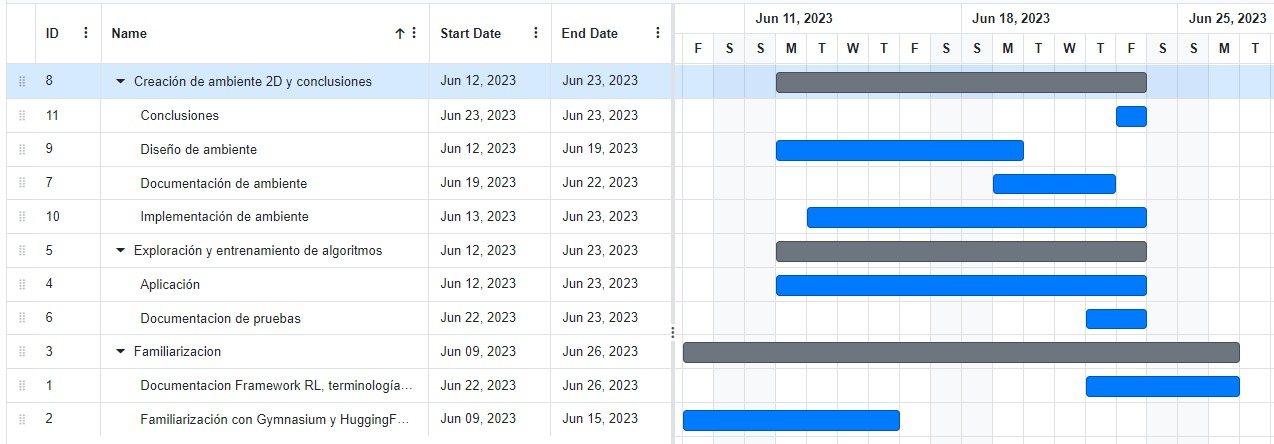


6. En cuanto al trabajo futuro, quedan muchas incógnitas abiertas que ameritan continuarse investigando, algunas de estas son:

  1. Corregir la lógica del método `step` usada en los entornos de la exploración 2 (*PushBoxRandPol*), para que éstos no permitan movimientos en falso contra los muros. Sospechamos que si éstos se registraran en cambio como "quedarse quieto" los resultados de la exploración 2.1. podríán cambiar potencialmente.

  2. Investigar a detalle cómo crear un sistema de recompensas que desestimule o estimule radicalmente determinados comportamientos. Esto como resultado de la exploración 2, en donde juntando las conclusiones del ambiente 2.1 y 2.2 podemos concluir que la falta de progreso al estimular el movimiento no nace sólo de movimientos en falso, sino también de que el modelo estaba llegando muy rápidamente a un estado estacionario lo que le impedía explorar nuevas combinaciones con mejores recompensas.

  3. Realizar una comparación detallada entre los algoritmos A2C y Q-Learning, así como de las diferencias entre algoritmos basados en políticas y los algoritmos basados en valores.
